### **Problem Statement**

- The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData]( https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data.shape

(1340, 7)

In [4]:
data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [6]:
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [8]:
data.CLMSEX.value_counts().index[0]

1.0

In [9]:
data.CLMINSUR.value_counts().index[0]

1.0

In [10]:
#Creating userdefined function for imputing missing values with mode(numerical & categorical)
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isna().sum()
    

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

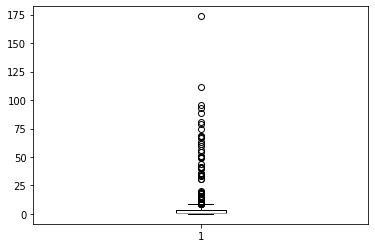

In [11]:
#loss column
plt.boxplot(data.LOSS)
plt.show()

-  1.Outliers also - missing values-->imputation
-  2.Winsorization-->outliers are replaced with next small value
example:[1,2,3,4,5,6,78,89,9000]-->9000 as an outlier-->9000 will be replaced with 89
one analysis -->including outliers
one analysis-->drop all outliers
    

In [12]:
#split data
X = data.iloc[:,1:]
y = data.ATTORNEY


In [13]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
# Build the classifier on training data
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train) # I/p and o/p will be passed to the fit method

C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [17]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

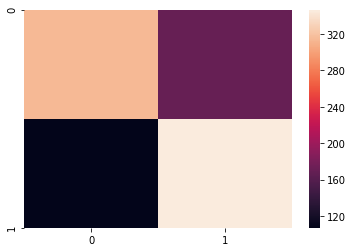

In [18]:
sns.heatmap(conf)

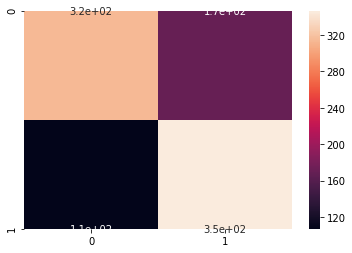

In [19]:
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True)

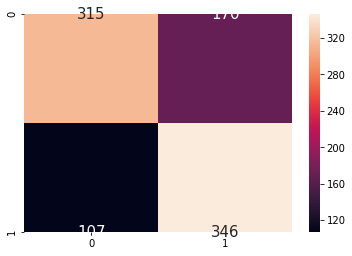

In [20]:
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='3.0f',annot_kws={'size':'15'})

In [21]:
#accuracy
(315+345)/(315+170+108+345)

0.7036247334754797

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [23]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

In [24]:
conf[0][0]
conf[0][1]

170

In [25]:
print('true_positive=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_negative=', conf[1][1])

true_positive= 315
false_positive= 170
false_negative= 107
true_negative= 346


In [29]:
true_positive=conf[0][0]
false_positive=conf[0][1]
false_negative = conf[1][0]
true_negative = conf[1][1]

In [30]:
precision = true_positive/(true_positive+false_positive)
precision

0.6494845360824743

In [31]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [33]:
#out of all actual values,how many are correctly classified
Recall = true_positive/(true_positive+false_negative)
Recall

0.7464454976303317

In [34]:
#calculation of f1-score for model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred) #f1_score(actual value,predicted value)

0.7141382868937047

In [ ]:
#predictions on test data
#calculate metrics for test data-->confusion matrix
#precision,recall,f1-score
#compare score with training data